Parte 1

In [1]:
# Import the required libraries
import matplotlib.pylab as plt
import cv2
import numpy as np
print("libraryimport")

libraryimport


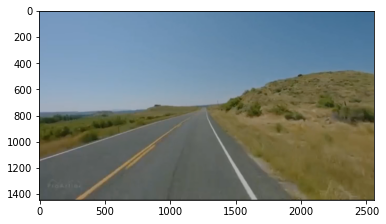

In [19]:
# Load image in OpenCV 
import cv2
lane_image = cv2.imread('./media/image_lane.jpeg')
 
# Convert the image in to RBG format using matplotlib
# The src (source) is our image which is the variable
colored_image = cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB)
 
# Show a window with the colored road image
plt.imshow(colored_image)
plt.show()

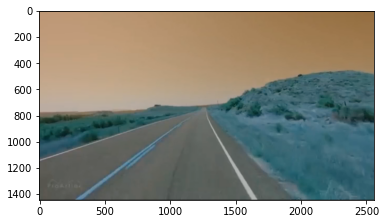

In [20]:
plt.imshow(lane_image)
plt.show()

In [21]:
# Find out the shape of the image, defining height (1442) and width (2560)
print(lane_image.shape)
height = lane_image.shape[0]
width = lane_image.shape[1]

(1444, 2560, 3)


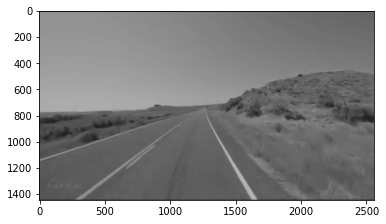

In [22]:
gray = cv2.cvtColor(colored_image, cv2.COLOR_RGB2GRAY)

# Show a window with the colored road image
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)
plt.show()

# save image locally
cv2.imwrite('./media/Grayscale.jpg', gray)


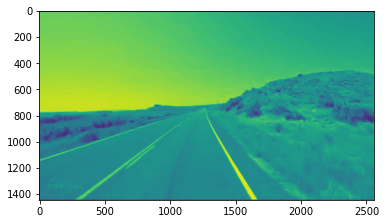

In [11]:
# Reduce Noise and Smoothen Image
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Show a window with the colored road image
plt.imshow(blur)
plt.show()

# save image locally
cv2.imwrite('./media/GaussianBlur.jpg', blur)

True

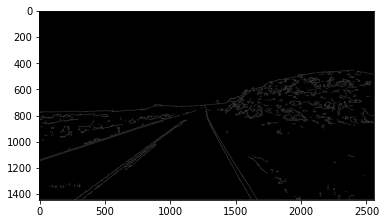

In [24]:
# Edge Detection (Canny)
cannyImage = cv2.Canny(blur, 50, 150)
 
#Define the region of interest
def CannyEdge(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  cannyImage = cv2.Canny(blur, 10, 30)
  return cannyImage
 
# Show a window with the road image after edge detection
plt.imshow(CannyEdge(colored_image), cmap="gray", vmin=0, vmax=255)
cv2.imwrite('./media/Canny.jpg', CannyEdge(colored_image))

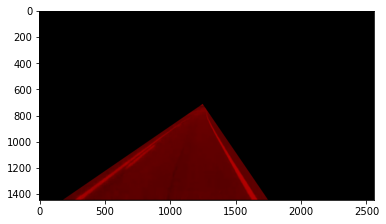

In [13]:
# Create a function called region_of_interest which takes one argument called image
def region_of_interest(image):
  height = image.shape[0]
  triangle = np.array([[(180, height),(1250, 710),(1750, height),]], np.int32)
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, triangle, 255)
  masked_image = cv2.bitwise_and(image, mask)
  return masked_image
plt.imshow(region_of_interest(colored_image))

184
1441


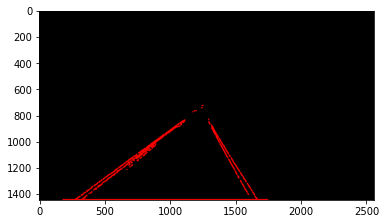

In [25]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        count=0
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            if count == 0:  
              print(x1)
              print(y1)
              count += 1
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
cannyImage = CannyEdge(colored_image)
cropped_Image = region_of_interest(cannyImage)
rho = 2
theta = np.pi/180
threshold = 100
lines = cv2.HoughLinesP(cropped_Image,rho, theta, threshold, np.array ([]))
line_image = display_lines(lane_image, lines)
plt.imshow(line_image, cmap="gray", vmin=0, vmax=255)

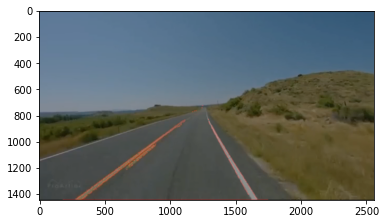

In [18]:
plt.imshow(line_image)
plt.imshow(colored_image, alpha=0.8)
plt.show()